In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
dataset = pd.read_csv('train.csv')
dataset1 = pd.read_csv('test.csv')
dataset3 = pd.read_csv('gender_submission.csv')

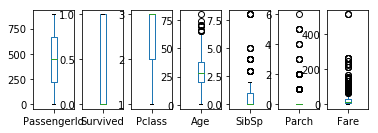

In [25]:
dataset.plot(kind='box', subplots=True, layout=(2,7), sharex=False, sharey=False)
plt.show()

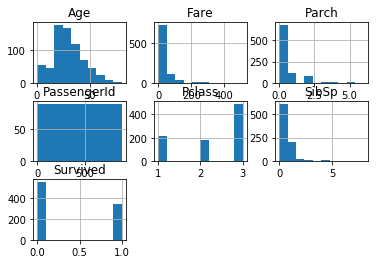

In [26]:
dataset.hist()
plt.show()

In [27]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
dataset1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [29]:
X_train= dataset.iloc[:,[2,4,5,6,7,9]].values
y_train= dataset.iloc[:,1:2].values
X_train

array([[3, 'male', 22.0, 1, 0, 7.25],
       [1, 'female', 38.0, 1, 0, 71.2833],
       [3, 'female', 26.0, 0, 0, 7.925],
       ...,
       [3, 'female', nan, 1, 2, 23.45],
       [1, 'male', 26.0, 0, 0, 30.0],
       [3, 'male', 32.0, 0, 0, 7.75]], dtype=object)

In [30]:
X_test = dataset1.iloc[:,[1,3,4,5,6,8]].values
y_test = dataset3.iloc[:,1:2].values
# filling the NAN values withh mean 

In [35]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values="NaN",strategy="mean",axis=0)
imputer = imputer.fit(X_train[:, 2:3])
X_train[:, 2:3] = imputer.transform(X_train[:,2:3])

imputer = Imputer(missing_values="NaN",strategy="mean",axis=0)
imputer = imputer.fit(X_test[:, [2,5]])
X_test[:, [2,5]] = imputer.transform(X_test[:,[2,5]])


In [39]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X_train[:,1] = labelencoder_X.fit_transform(X_train[:, 1])
onehotencoder = OneHotEncoder(categorical_features=[0])
X_train = onehotencoder.fit_transform(X_train).toarray()


labelencoder_X1 = LabelEncoder()
X_test[:,1] = labelencoder_X1.fit_transform(X_test[:, 1])
onehotencoder1 = OneHotEncoder(categorical_features=[0])
X_test = onehotencoder1.fit_transform(X_test).toarray()


In [40]:
# performing standard scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [43]:
X_test

array([[ 0.58655899, -0.58655899, -0.5349335 , ..., -0.49947002,
        -0.4002477 , -0.49840706],
       [ 0.58655899, -0.58655899, -0.5349335 , ...,  0.61699237,
        -0.4002477 , -0.51327429],
       [ 0.58655899, -0.58655899,  1.86939125, ..., -0.49947002,
        -0.4002477 , -0.46508846],
       ...,
       [ 0.58655899, -0.58655899, -0.5349335 , ..., -0.49947002,
        -0.4002477 , -0.50879189],
       [ 0.58655899, -0.58655899, -0.5349335 , ..., -0.49947002,
        -0.4002477 , -0.4944482 ],
       [ 0.58655899, -0.58655899, -0.5349335 , ...,  0.61699237,
         0.61989583, -0.23790598]])

In [42]:
# performng PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

ValueError: operands could not be broadcast together with shapes (418,9) (10,) 

In [44]:
from sklearn.linear_model import LinearRegression
#maiing object
regressor = LinearRegression()
#trainnig the model
regressor.fit(X_train, y_train)
#predicting the model on test data ste
y_pred = regressor.predict(X_test)
y_pred = y_pred > 0.5
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
l = dataset3.iloc[:,0].values

y_pred[1]

sub =[]
for i in range(len(y_pred)):
    if(y_pred[i]==False):
        sub.append(0)
    else:
        sub.append(1)
        
j = np.asarray(sub)

ValueError: shapes (418,9) and (10,1) not aligned: 9 (dim 1) != 10 (dim 0)

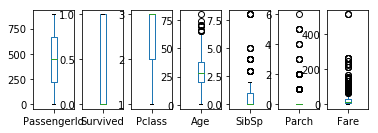

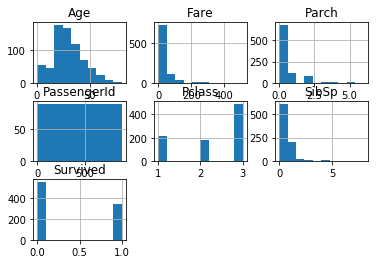

In [45]:

# imported library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('train.csv')
dataset1 = pd.read_csv('test.csv')
dataset3 = pd.read_csv('gender_submission.csv')
#checking nan in columbs of dataset
dataset.isnull().sum()
dataset1.isnull().sum()
#checking the datatype of series in dataframes
dataset.dtypes
#checking shape
dataset.shape
dataset.head(30)
dataset.describe()
#visualing the data
dataset.plot(kind='box', subplots=True, layout=(2,7), sharex=False, sharey=False)
plt.show()

dataset.hist()
plt.show()
#making traing nad test datset
X_train= dataset.iloc[:,[2,4,5,6,7,9]].values
y_train= dataset.iloc[:,1:2].values

X_test = dataset1.iloc[:,[1,3,4,5,6,8]].values
y_test = dataset3.iloc[:,1:2].values
# filling the NAN values withh mean 
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values="NaN",strategy="mean",axis=0)
imputer = imputer.fit(X_train[:, 2:3])
X_train[:, 2:3] = imputer.transform(X_train[:,2:3])

imputer = Imputer(missing_values="NaN",strategy="mean",axis=0)
imputer = imputer.fit(X_test[:, [2,5]])
X_test[:, [2,5]] = imputer.transform(X_test[:,[2,5]])

# making the dummy varaible of catagorical data


from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X_train[:,1] = labelencoder_X.fit_transform(X_train[:, 1])
onehotencoder = OneHotEncoder(categorical_features=[0])
X_train = onehotencoder.fit_transform(X_train).toarray()

labelencoder_X1 = LabelEncoder()
X_test[:,1] = labelencoder_X1.fit_transform(X_test[:, 1])
onehotencoder1 = OneHotEncoder(categorical_features=[0])
X_test = onehotencoder1.fit_transform(X_test).toarray()

# performing standard scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

# performng PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

#importing model
from sklearn.linear_model import LinearRegression
#maiing object
regressor = LinearRegression()
#trainnig the model
regressor.fit(X_train, y_train)
#predicting the model on test data ste
y_pred = regressor.predict(X_test)
y_pred = y_pred > 0.5
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
l = dataset3.iloc[:,0].values

y_pred[1]

sub =[]
for i in range(len(y_pred)):
    if(y_pred[i]==False):
        sub.append(0)
    else:
        sub.append(1)
        
j = np.asarray(sub)
# accuracy of 97.84%




In [46]:
cm

array([[146, 120],
       [ 72,  80]], dtype=int64)

In [47]:
100*(146+80)/(120+72)

117.70833333333333

In [51]:
len(j)

418

In [53]:
submission = pd.DataFrame()
submission['PassengerId'] = dataset1['PassengerId']
submission['Survived'] = j 
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,0
4,896,0


In [55]:

submission['Survived'] = submission['Survived'].astype(int)
print('Converted Survived column to integers.')
if len(submission) == len(dataset1):
    print("Submission dataframe is the same length as test ({} rows).".format(len(submission)))
else:
    print("Dataframes mismatched, won't be able to submit to Kaggle.")
    
# Convert submisison dataframe to csv for submission to csv 
# for Kaggle submisison
submission.to_csv('linear_reg_submission.csv', index=False)
print('Submission CSV is ready!')

# Check the submission csv to make sure it's in the right format
submissions_check = pd.read_csv("linear_reg_submission.csv")
submissions_check.head()

Converted Survived column to integers.
Submission dataframe is the same length as test (418 rows).
Submission CSV is ready!


,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,0
4,896,0
